# 連立常微分方程式
ここでは多次元の常微分方程式を扱う．  
有名なローレンツ方程式の初期値問題を解いてみます．  
<br>
<br>
<!-- <img src="https://latex.codecogs.com/svg.image?\begin{pmatrix}\dot{x}\\\dot{y}\\\dot{z}\end{pmatrix}&space;=&space;\begin{pmatrix}-px&plus;py\\-xz&plus;rx-y\\xy-bz\end{pmatrix}" title="\bg_white \dot{x}=ax">  
<br> -->

$$
\begin{bmatrix}
\dot{x}\\
\dot{y}\\
\dot{z}\\
\end{bmatrix} = \begin{bmatrix}
-px+py\\
-xz+rx-y\\
xy-bz\\
\end{bmatrix}
$$

ただし  

$$
\begin{bmatrix}
x_0\\
y_0\\
z_0\\
\end{bmatrix} = \begin{bmatrix}
0\\
4\\
28\\
\end{bmatrix},  \quad  p = 10,  \quad  r = 28,  \quad  b = \frac{8}{3}
$$

とする．  

In [1]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

## 微分方程式の定義
時刻`t`, 状態ベクトルの配列`x`, ...を受け取り，`x`の微分を**一次元の配列**で返す関数を作る．  

In [2]:
def lorenz_list(t, X, p, r, b):
    """Xはリスト"""
    x, y, z = X
    
    dx = -p*x + p*y
    dy = -x*z + r*x -y
    dz = x*y - b*z
    
    return [dx, dy, dz]

返り値はndarrayでもよい．（numpyで検索してください）  

In [3]:
def lorenz_nd(t, X, p, r, b):
    """Xはndarray"""
    x, y, z = X
    
    dx = -p*x + p*y
    dy = -x*z + r*x -y
    dz = x*y - b*z
    
    return np.array([dx, dy, dz])

初期値，刻み時間，パラメータを準備する．（出典：[https://ja.wikipedia.org/wiki/%E3%83%AD%E3%83%BC%E3%83%AC%E3%83%B3%E3%83%84%E6%96%B9%E7%A8%8B%E5%BC%8F](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%83%BC%E3%83%AC%E3%83%B3%E3%83%84%E6%96%B9%E7%A8%8B%E5%BC%8F)）  
初期値は微分方程式の戻り値の型に合わせる．  
上の場合，`lorenz_list`なら初期値は普通のリスト，`lorenz_nd`ならndarrayとする．  

In [4]:
TIME_SPAN = 50
TIME_INTERVAL = 0.01

X0_list = [0, 4, 28]
X0_md = np.array(X0_list)

p = 10
r = 28
b = 8/3

## solve_ivpで解く

In [5]:
sol = integrate.solve_ivp(
    fun = lorenz_list,
    t_span = (0, TIME_SPAN),
    y0 = X0_list,
    t_eval=np.arange(0, TIME_SPAN, TIME_INTERVAL),
    args=(p, r, b)
)

## 解をプロット

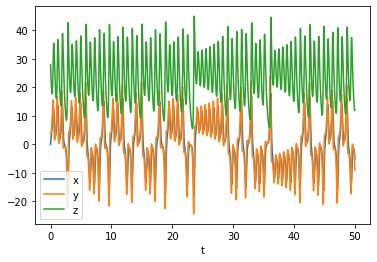

In [6]:
plt.plot(sol.t, sol.y[0], label="x")
plt.plot(sol.t, sol.y[1], label="y")
plt.plot(sol.t, sol.y[2], label="z")
plt.xlabel("t")
plt.legend()

周期的な振動が起こっていることがわかる．  
x, y, zの時刻歴を三次元プロットしてみる．  

Text(0.5, 0, 'z')

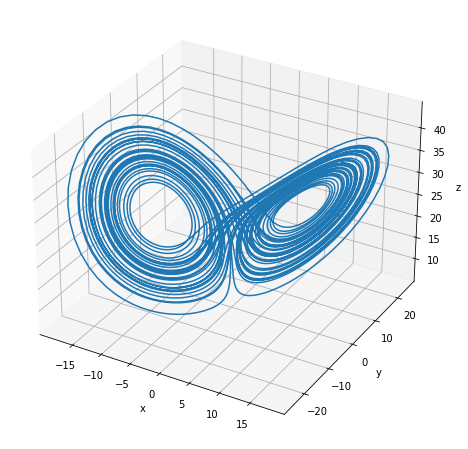

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

有名なローレンツアトラクタの図が得られた．  
この図と[simple2.ipynb](simple2.ipynb)でソルバーを使わずに自前のルンゲクッタで求めた図を比べると，少し渦巻きの形が異なることがわかる．  
これは使用しているアルゴリズムが違うためである．scipyでは  s

****
## 二次元ndarray
`solve_ivp`に渡す微分方程式関数の引数`x`は1次元配列である．  
状態変数の微分を計算する過程で状態ベクトルの演算を扱うことがあるが，1次元では積が計算できず不便です．  

<br>
1次元配列では不便な例 :  
<img src="https://latex.codecogs.com/svg.image?\dot{x}&space;=&space;Ax,&space;x\in{\mathbb{R}^n},&space;A\in{\mathbb{R}^{n\times{}n}}" title="\dot{x} = Ax, x\in{\mathbb{R}^n}, A\in{\mathbb{R}^{n\times{}n}}" />  
<br>
このような場合は，はじめに`reshape`を使って二次元化するとよい．  

In [25]:
A = np.array([
    [0, 1],
    [-0.98, -0.1],
])  # 状態方程式のA行列

def dX(t, X):
    
    X = X.reshape(-1, 1)  # 2次元化
    
    dX = A @ X  # 行列の積演算@が使える
    
    return np.ravel(dX)  # np.ravel()で二次元行列を1次元化できる

微分方程式を定義した関数の戻り値も1次元でないとエラーになる．  
`np.ravel(dX)`で1次元化するか，  
```python
np.array([dX[0,0], dX[0,1]])
```
のように手動で1次元化する．  

In [28]:
sol2 = integrate.solve_ivp(
    fun = dX,
    t_span=(0, 50),
    t_eval=np.arange(0, 50, 0.1),
    y0 = np.array([10, 2])
)

解を確認

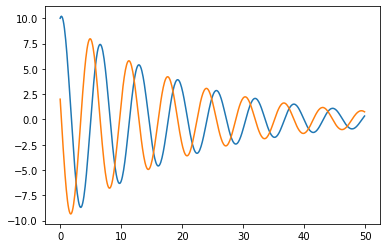

In [29]:
plt.plot(sol2.t, sol2.y[0])
plt.plot(sol2.t, sol2.y[1])